In [110]:
# 1、自己先手动将excel文件转化成csv文件；
# 2、使用pd.read_csv方法导入数据；
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/matao/Study/data_analyst/python体验课学习/data_test2.csv", encoding = "gb18030",engine='python')

print(data[130:133])




     省级政区代码 省级政区名称  地市级政区代码 地市级政区名称    年份 党委书记姓名    出生年份  出生月份    籍贯省份代码  \
130  140000    山西省   140100     太原市  2009    申维辰  1956.0   5.0  140000.0   
131  140000    山西省   140100     太原市  2010    申维辰  1956.0   5.0  140000.0   
132  140000    山西省   140200     大同市  2000    靳善忠  1949.0   5.0  140000.0   

    籍贯省份名称   ...    民族  教育 是否是党校教育（是=1，否=0） 专业：人文 专业：社科  专业：理工  专业：农科  专业：医科  \
130    山西省   ...    汉族  本科              0.0   0.0   0.0    0.0    0.0    0.0   
131    山西省   ...    汉族  本科              0.0   0.0   0.0    0.0    0.0    0.0   
132    山西省   ...    汉族  中专              0.0   0.0   0.0    1.0    0.0    0.0   

       入党年份    工作年份  
130  1979.0  1969.0  
131  1979.0  1969.0  
132  1975.0  1969.0  

[3 rows x 23 columns]


In [111]:
data_test = data[130:133]
print(data_test[['党委书记姓名','性别']])
#这个地方，需要多个列名的时候，是要使用“[[]]”，双方括号，这个地方需要再研究一下。。。。？？？

    党委书记姓名 性别
130    申维辰  男
131    申维辰  男
132    靳善忠  男


In [112]:
field = data.columns.tolist()# 将data数据的列名转化为list
print(field)
print(type(field))

['省级政区代码', '省级政区名称', '地市级政区代码', '地市级政区名称', '年份', '党委书记姓名', '出生年份', '出生月份', '籍贯省份代码', '籍贯省份名称', '籍贯地市代码', '籍贯地市名称', '性别', '民族', '教育', '是否是党校教育（是=1，否=0）', '专业：人文', '专业：社科', '专业：理工', '专业：农科', '专业：医科', '入党年份', '工作年份']
<class 'list'>


In [113]:
# print(data.describe(include=[np.number]))
# describe方法：返回基本的数据信息（即，基本信息的统计）
# describe():没有参数，则默认只统计数值类型的字段内容，包括：计数（count），平均数（mean），方差（std），最小值（min），最大值（max），四分位数（25%，50%，75%），若其中有字符串数据会报
# describe(include=[np.number]): 指定只统计数值类型；


print(data.describe(include=[np.object]))
# describe(include=[np.object]): 只统计字符串类型的字段内容：计数（count），唯一值数量（unique），出现频率最高的内容（top），最高出现频率（freq）


       省级政区名称 地市级政区名称 党委书记姓名 籍贯省份名称 籍贯地市名称    性别    民族    教育
count    3663    3663   3021   2624   2615  2708  2517  2550
unique     27     333    901     29    240     2     2     7
top       广东省     绍兴市    焉荣竹    山东省    威海市     男    汉族    硕士
freq      231      11     11    313     58  2633  2351  1381


In [114]:
'''问题一 性别构成'''

'问题一 性别构成'

In [115]:
data_gender = data['性别']
#print(data_gender[130:150])
#print(data_gender.head(10))
#print(type(data_gender.notnull())) # 发现data_gender.notnull()返回的是这个类型pandas.core.series.Series
#print(data_gender[data_gender.notnull()]) # 所有就可以这样使用:data_gender[data_gender.notnull()]
data_gender_re = data_gender[data_gender.notnull()]
print(data_gender_re.unique()) 

['男' '女']


In [116]:
count = len(data_gender_re)
count_m = len(data_gender_re[data_gender_re == '男'])
count_w = len(data_gender_re[data_gender_re == '女'])
print(count, count_m, count_w)
count == count_m + count_w
rate_m = count_m / count
rate_w = count_w /count
print(rate_m)
print(rate_w)


2708 2633 75
0.9723042836041359
0.027695716395864108


In [91]:
# 按省份分析市委书记女性比例

data_gender2 = data[["省级政区名称",'性别','民族']]
# print(type(data_gender2))
data_gender2_re = data_gender2[data_gender2['性别'].notnull()]
# print(len(data_gender2_re))
# print(data_gender2_re.head())
# print('----------')

# 按照省份统计出男女人数
pt = pd.crosstab(data_gender2_re['省级政区名称'],data_gender2_re['性别'])
print(data_gender2_re['省级政区名称'].head())
print(data_gender2_re['性别'].head())
print(pt.head())
print('----------')
#print(pt['女'])
# crosstab(参数1, 参数2)：按照参数1，统计出参数2的数量

# 计算出女性占比
pt['女性占比'] = pt['女'] / (pt['女']+pt['男'])
#print(pt['女性占比'].head())
pt2 = pt.sort_values(by=['女性占比'],ascending=False)
print(pt2['女性占比'][:10])

                        

121    山西省
122    山西省
123    山西省
124    山西省
125    山西省
Name: 省级政区名称, dtype: object
121    男
122    男
123    男
124    男
125    男
Name: 性别, dtype: object
性别       女    男
省级政区名称         
云南省      2   73
内蒙古自治区   0   86
吉林省      4   72
四川省      8  155
宁夏回族自治区  0   49
----------
省级政区名称
辽宁省    0.097015
陕西省    0.088235
吉林省    0.052632
山西省    0.050847
四川省    0.049080
安徽省    0.040230
江西省    0.034188
山东省    0.032609
福建省    0.030303
云南省    0.026667
Name: 女性占比, dtype: float64


Index(['辽宁省', '陕西省', '吉林省', '山西省', '四川省', '安徽省', '江西省', '山东省', '福建省', '云南省'], dtype='object', name='省级政区名称')


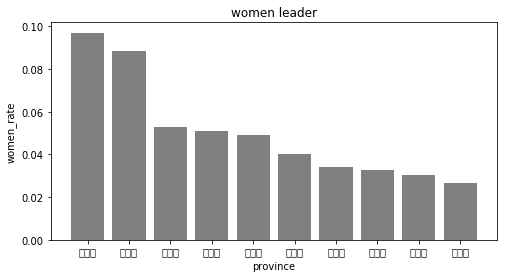

In [119]:
# 绘制图表1：不同省份女性市委书记占比
fig_q1_1 = plt.figure(figsize=(8, 4))

index = pt2.index[:10]
print(index)
plt.bar(range(10),pt2['女性占比'][:10],tick_label=index,color='gray')
# plt.bar() 创建柱状图
# ple.bar(横坐标，纵坐标，标签（x轴），颜色)
plt.title('women leader')
plt.xlabel('province')
plt.ylabel('women_rate')
plt.show()

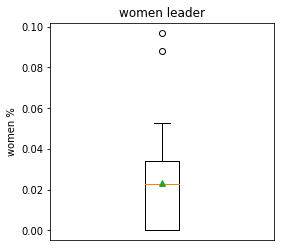

In [120]:
#绘制图表2：女性市委书记占比结构
fig_q1_2 = plt.figure(figsize=(4, 4))
plt.boxplot(pt2['女性占比'],vert=True,showmeans=True)
plt.title("women leader")
plt.xticks([])
plt.ylabel('women %')
plt.show()



In [ ]:
'''
Part3 年龄情况，专业问题
'''

In [124]:
# # 年龄情况：整体年龄分布 / 入职年份分布 / 卸任年份分布
data_age = data[['出生年份', '党委书记姓名', '年份']]
data_age_re = data_age[data_age['出生年份'].notnull()]
# #print(data_age['出生年份'].notnull()[130:150])
# #print(data_age_re.head())
data_age_re2 = data_age_re[['出生年份','党委书记姓名']].drop_duplicates()
# print(data_age_re2)
# #print(data_age_re['党委书记姓名'].unique())
# # print(data_age_re.describe())
# print('----------------')

# df1 = 2018 - data_age_re['出生年份']
# print(df1.head())
df1_re = 2018 - data_age_re2['出生年份']
print(df1_re.head())
# # print('----------------')
# #print(df1_re)

#df_yearmin 可以看做是一张表，表的结构是：先拿出“党委书记姓名”和“年份”的数据，然后按照“党委书记姓名”的姓名排序(排序规则暂时不太懂？？？)
df_yearmin = data_age_re[['党委书记姓名', '年份']].groupby(data_age_re['党委书记姓名']).min() #代表 新任职的年份【党委书记姓名+年份】
print(df_yearmin.head(10))
# #将df_yearmin表拿出来，使用“年份”排序之后，再对“年份”计算count
df2 = df_yearmin['年份'].groupby(df_yearmin['年份']).count() #这个就表示在200X年，新任职的有count人，这个没有重复数据。取了最小值。
print(df2)
print("-------------")

df_yearmax = data_age_re[['党委书记姓名', '年份']].groupby(data_age_re['党委书记姓名']).max() #代表 卸任的年份【党委书记姓名+年份】
print(df_yearmax.head(10))
df3 = df_yearmax['年份'].groupby(df_yearmax['年份']).count() #这个就表是在200X年，卸任的有count人
print(df3)


121    73.0
123    68.0
127    62.0
132    69.0
134    73.0
Name: 出生年份, dtype: float64
       党委书记姓名    年份
党委书记姓名             
丁海中       丁海中  2003
丁耀民       丁耀民  2000
丁解民       丁解民  2001
万庆良       万庆良  2005
丰立祥       丰立祥  2008
乔延春       乔延春  2000
于伟         于伟  2003
于伟国       于伟国  2009
于建成       于建成  2006
于捷         于捷  2000
年份
2000    190
2001     69
2002     65
2003     88
2004     51
2005     55
2006     50
2007     59
2008     99
2009     23
Name: 年份, dtype: int64
-------------
       党委书记姓名    年份
党委书记姓名             
丁海中       丁海中  2009
丁耀民       丁耀民  2003
丁解民       丁解民  2007
万庆良       万庆良  2007
丰立祥       丰立祥  2010
乔延春       乔延春  2002
于伟         于伟  2007
于伟国       于伟国  2010
于建成       于建成  2010
于捷         于捷  2002
年份
2000     47
2001     44
2002     71
2003     38
2004     48
2005     49
2006     58
2007    105
2008     25
2009     41
2010    223
Name: 年份, dtype: int64


In [127]:
# 专业情况：专业结构 / 专业整体情况 / 专业大类分布 
data_major = data[['党委书记姓名','年份','专业：人文','专业：社科','专业：理工','专业：农科','专业：医科']]
data_major_re = data_major[data_major['专业：人文'].notnull()]
#print(data_major_re.head())
#print(data_major_re.describe())

# 统计每个人的专业。。下面方法有个问题：遇到双专业的怎么办？？？？
data_major_re['专业'] = data_major_re[['专业：人文', '专业：社科', '专业：理工', '专业：农科', '专业：医科']].idxmax(axis=1)
#print(data_major_re.head(10))

data_major_st = data_major_re[['专业', '党委书记姓名']].drop_duplicates()
#print(data_major_st.head(10))

df4 = data_major_st['专业'].groupby(data_major_st['专业']).count()
print(df4)

df5 = pd.crosstab(data_major_re['年份'], data_major_re['专业'])
print(df5)

df5['社科比例'] = df5['专业：社科'] / (df5['专业：理工'] + df5['专业：医科'] + df5['专业：社科'] + df5['专业：农科'] + df5['专业：人文'])
df5['人文比例'] = df5['专业：人文'] / (df5['专业：理工'] + df5['专业：医科'] + df5['专业：社科'] + df5['专业：农科'] + df5['专业：人文'])
df5['理工农医比例'] = (df5['专业：理工'] + df5['专业：医科'] + df5['专业：农科'])/ (df5['专业：理工'] + df5['专业：医科'] + df5['专业：社科'] + df5['专业：农科'] + df5['专业：人文'])
#print(df5[['社科比例','人文比例','理工农医比例']])




专业
专业：人文    187
专业：农科     21
专业：医科      5
专业：理工    127
专业：社科    347
Name: 专业, dtype: int64
专业    专业：人文  专业：农科  专业：医科  专业：理工  专业：社科
年份                                     
2000     33      7      2     43     53
2001     42      6      3     35     79
2002     56      5      4     35     90
2003     67      7      2     25    106
2004     68      7      2     28    118
2005     63      7      2     31    123
2006     67      9      2     34    123
2007     69      8      2     34    128
2008     68      8      0     44    130
2009     67      8      0     42    131
2010     71      7      0     38    131


/Users/matao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


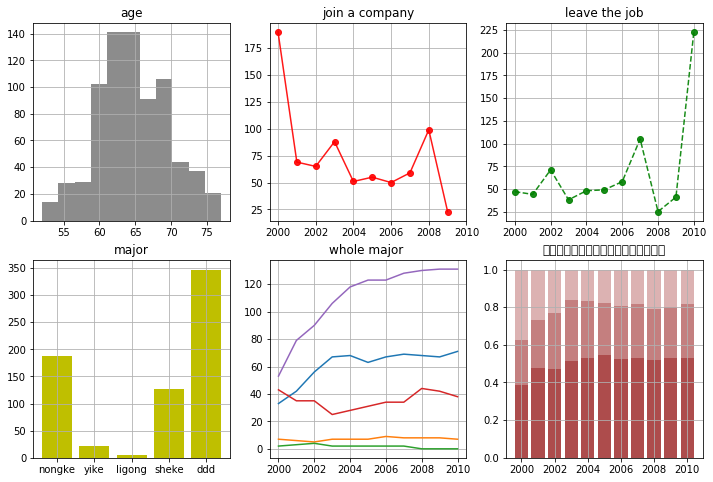

In [129]:
# 年龄情况：图表绘制

fig_q2 = plt.figure(figsize=(12, 8))

ax1 = fig_q2.add_subplot(2, 3, 1)
ax2 = fig_q2.add_subplot(2, 3, 2)
ax3 = fig_q2.add_subplot(2, 3, 3)
ax4 = fig_q2.add_subplot(2, 3, 4)
ax5 = fig_q2.add_subplot(2, 3, 5)
ax6 = fig_q2.add_subplot(2, 3, 6)

ax1.hist(df1_re, bins=11, color='gray', alpha=0.9) #df1的数据应该有一些重复数据,所以这里我做了优化用df1_re ，剔除重复数据
ax1.set_title("age")
ax1.grid(True)

#入职年份分布
ax2.plot(df2, color='r', marker='o',alpha=0.9)
ax2.set_title("join a company")
ax2.set_xticks(range(2000,2011,2))
ax2.grid(True)

#卸任年份分布
ax3.plot(df3, color='g', marker='o',linestyle='dashed', alpha=0.9)
ax3.set_title("leave the job")
ax3.set_xticks(range(2000, 2011,2))
ax3.grid(True)

#以上两个数据有点意思，说明了领导班子这十年是稳定的，2000年入职的，十年后离职
#奇怪的一点是，有点对数据怀疑。比如以2000年为例，似乎缺少了离职数据。上一代的领导班子呢？？？？？

ax4.bar(range(len(df4)), df4, color='y')
ax4.set_xticklabels(['','nongke','yike','ligong', 'sheke','ddd']) #神奇，为什么要传最前面的空字符串？？？？
ax4.grid(True)
ax4.set_title('major')

ax5.plot(df5.index, df5[['专业：人文','专业：农科','专业：医科','专业：理工','专业：社科']])
ax5.grid(True)
ax5.set_title('whole major ')

ax6.bar(df5.index, df5['社科比例'],color='darkred', alpha=0.7)
ax6.bar(df5.index, df5['人文比例'], color='darkred', bottom=df5['社科比例'], alpha=0.5)
ax6.bar(df5.index, df5['理工农医比例'], color='darkred', bottom=df5['人文比例'] + df5['社科比例'], alpha=0.3)
ax6.set_title('专业大类分布：社科、人文、理工农医')
ax6.grid(True)
plt.show()



In [ ]:
'''
Part4  问题三_任期情况
'''

In [128]:
#这里研究一下出生年份和任期的关系

data_term = data[['年份','党委书记姓名','出生年份']]
data_term_re = data_term[data_term['出生年份'].notnull()]
#print(data_term_re.head())
#print(data_term_re['出生年份'].unique())

print("\n第③个===========")
year_max = data_term_re[['出生年份','年份']].groupby(data_term_re['党委书记姓名']).max() 
#groupby之后，其实已经更改了“索引”，比如现在的索引就是 “党委书记姓名”
year_max.rename(columns={'年份':'年份max'},inplace=True)
year_max['姓名'] = year_max.index
print(year_max.head())

print("\n第④个===========")
year_min = data_term_re[['出生年份','年份']].groupby(data_term_re['党委书记姓名']).min()
year_min.rename(columns={'年份':'年份min'}, inplace=True)
year_min['姓名'] = year_min.index
print(year_min.head())

print("\n第⑤个===========")
data_term_fin = pd.merge(year_max, year_min)
#merge之后，index序号从之前的121变成了0，
#也就是说对原来的顺序进行了重新排序，并重置为0
# merge建立在两张表的索引完全一致吗？？？？？？
print(data_term_fin.head())

print("\n第⑥个===========")
data_term_fin['任期'] = data_term_fin['年份max'] - data_term_fin['年份min']
print(data_term_fin.head())

print("\n第⑦个===========")
print(data_term_fin.dtypes)




第③个===========
          出生年份  年份max   姓名
党委书记姓名                    
丁海中     1951.0   2009  丁海中
丁耀民     1948.0   2003  丁耀民
丁解民     1951.0   2007  丁解民
万庆良     1964.0   2007  万庆良
丰立祥     1957.0   2010  丰立祥

第④个===========
          出生年份  年份min   姓名
党委书记姓名                    
丁海中     1951.0   2003  丁海中
丁耀民     1948.0   2000  丁耀民
丁解民     1951.0   2001  丁解民
万庆良     1964.0   2005  万庆良
丰立祥     1957.0   2008  丰立祥

第⑤个===========
     出生年份  年份max   姓名  年份min
0  1951.0   2009  丁海中   2003
1  1948.0   2003  丁耀民   2000
2  1951.0   2007  丁解民   2001
3  1964.0   2007  万庆良   2005
4  1957.0   2010  丰立祥   2008

第⑥个===========
     出生年份  年份max   姓名  年份min  任期
0  1951.0   2009  丁海中   2003   6
1  1948.0   2003  丁耀民   2000   3
2  1951.0   2007  丁解民   2001   6
3  1964.0   2007  万庆良   2005   2
4  1957.0   2010  丰立祥   2008   2

第⑦个===========
出生年份     float64
年份max      int64
姓名        object
年份min      int64
任期         int64
dtype: object


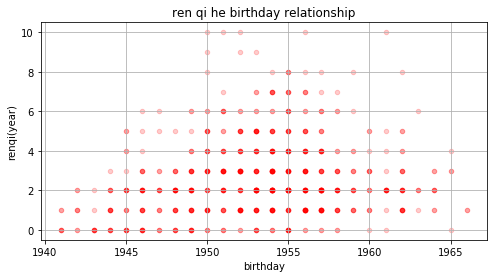

0    1951.0
1    1948.0
2    1951.0
3    1964.0
4    1957.0
5    1948.0
6    1955.0
7    1955.0
8    1953.0
9    1949.0
Name: 出生年份, dtype: float64
0    6
1    3
2    6
3    2
4    2
5    2
6    4
7    1
8    4
9    2
Name: 任期, dtype: int64


In [35]:
# 绘制图表1：任期与出生年份关系
fig_q3_1 = plt.figure(figsize=(8, 4))

# 创建散点图，
plt.scatter(data_term_fin['出生年份'], data_term_fin['任期'], color='r',alpha=0.2, s=20)
# 参数1：横坐标
# 参数2，纵坐标
plt.title('ren qi he birthday relationship')
plt.xlabel('birthday')
plt.ylabel('renqi(year)')
plt.grid(True)
plt.show()

print(data_term_fin['出生年份'].head(10))
print(data_term_fin['任期'].head(10))



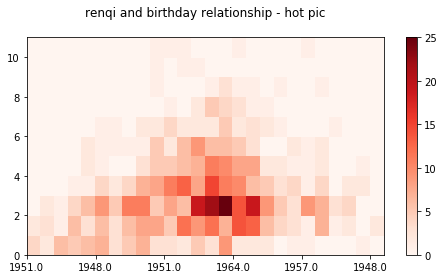

In [89]:
# 绘制图表2：任期与出生年份关系 - 热图

fig_q3_2 = plt.figure(figsize=(8,4))
df = pd.crosstab(data_term_fin['任期'], data_term_fin['出生年份'])
# print("\n第①个===========")
# print(data_term_fin['任期'].head())

# print("\n第②个===========")
# print(data_term_fin['出生年份'].head())

# print("\n第③个===========")
# print(df.head())

ax = fig_q3_2.add_subplot(111) #图的大小
cax = ax.pcolor(df, cmap='Reds') #颜色，必须大小写，且加s
#cax = ax.matshow(df, cmap='Reds_r')  # Reds_r 表示Reds颜色的反转
fig_q3_2.colorbar(cax)
plt.title('renqi and birthday relationship - hot pic\n')
ax.set_xticklabels(data_term_fin['出生年份'].tolist())
plt.show()

In [93]:
fig_test = plt.figure(figsize=(8, 4))
plt.show()
